
## Projet data science

Objectifs:
- clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


In [4]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### Importer le tableau de données dans un dataframe 

In [5]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv")
df_or = df.copy()
df.head(10)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse


In [6]:
print("Nombre total d'observations: {}  \n".format(df.shape[0]))
print("Le sommes des valeus manquantes par variables : \n")
print(df.isna().sum())


Nombre total d'observations: 9582  

Le sommes des valeus manquantes par variables : 

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


### Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [7]:
# remplacer les ',' par des '.' pour bien convertir les chiffres après la virgule dans la variable "Experience"
df['Experience'] = df.Experience.str.replace(',', '.').astype(float)

# remplire les valeurs manquantes dans la variable "Experience" par la valeur médiane pour les data scientists
df_DS =  df.loc[df['Metier']=='Data scientist','Experience']
df_DS = df_DS.fillna(df_DS.median())
df.loc[df['Metier']=='Data scientist','Experience'] = df_DS.copy() 
print('Les valeurs manquantes dans Experience pour les data scientists', df.loc[df['Metier']=='Data scientist','Experience'].isnull().sum())

# remplire les valeurs manquantes dans la variable "Experience" par la valeur médiane pour les data engineers
df_DS =  df.loc[df['Metier']=='Data scientist','Experience']
df_DS = df_DS.fillna(df_DS.median())
df.loc[df['Metier']=='Data scientist','Experience'] = df_DS.copy() 
print('Les valeurs manquantes dans Experience pour les data engineers', df.loc[df['Metier']=='Data scientist','Experience'].isnull().sum())


Les valeurs manquantes dans Experience pour les data scientists 0
Les valeurs manquantes dans Experience pour les data engineers 0


### Années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne

In [8]:
df_mean =  df[df['Metier'].isin(['Data scientist','Data engineer','Lead data scientist'])]
print("Les profils ont en moyenne:")
df_mean.groupby('Metier')['Experience'].mean()


Les profils ont en moyenne:


Metier
Data engineer          2.984959
Data scientist         2.241268
Lead data scientist    3.965261
Name: Experience, dtype: float64

### Représentation graphique du nombre moyen d'années d'expériences pour chaque métier

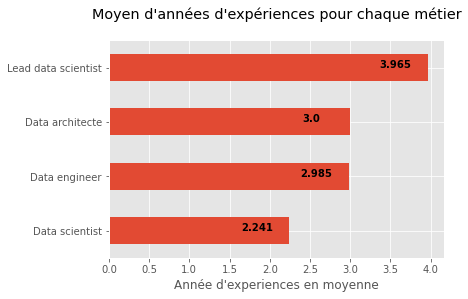

In [9]:

df_Ex = df.groupby('Metier')['Experience'].mean()
df_mean = [df_Ex.get(k) for k in  df['Metier'].value_counts().keys()] 
#df_Ex = df.groupby('Metier')['Experience'].mean()
x=-0.6; y=0.25
ax = pd.Series(df_mean, index= df['Metier'].value_counts().keys()).plot(kind='barh')
totals =[] 
for p in ax.patches:
    totals.append(p.get_width())
    total = np.sum(totals)    
for ix,i in enumerate(ax.patches, 0):
    ax.text(i.get_width()+x, i.get_y()+y, str(round(df_mean[ix],3)), weight='bold', color='black')
plt.xlabel("Année d'experiences en moyenne")
plt.title("Moyen d'années d'expériences pour chaque métier\n")
plt.show()

### Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert


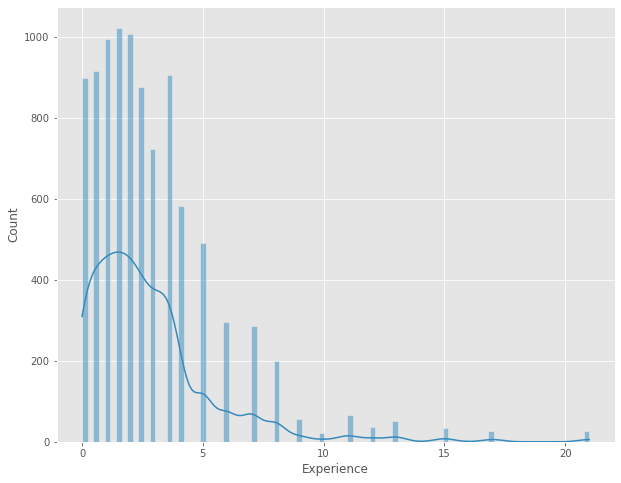

In [10]:
# Plot histogramme de variable Expérience pour déterminer sa distribution et choisi la bonne méthode de découpage
plt.figure(figsize=(10,8))
sb.histplot(df,x='Experience', kde=True, ) 
plt.show()

**La distribution est asymétrique à gauche, alors on a choisi la discrétisation selon une progression arithmétique pour créer des classes équidistants, mais la fréquence des échantillons est inégale dans chaque classe.**

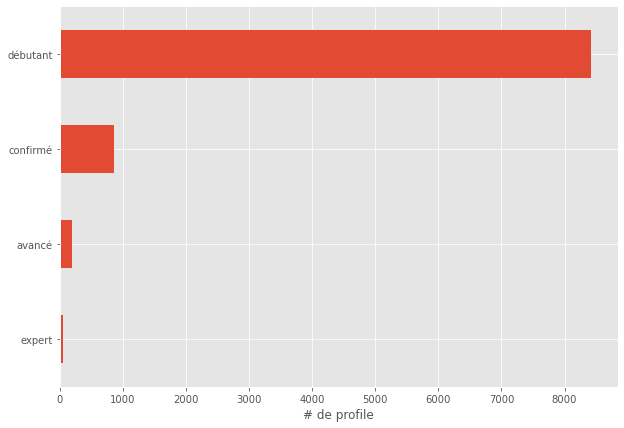

In [11]:
labels = ['débutant', 'confirmé', 'avancé', 'expert']
Exp_level = pd.cut(df['Experience'], bins=4, labels= labels)
df["Exp_level"] = pd.Series(Exp_level, index=df.index)
# Affichage des résultats
ax = pd.Series(df['Exp_level'].value_counts().values, index=df['Exp_level'].value_counts().keys()).plot.barh(figsize=(10,7))
plt.xlabel("# de profile")
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax.invert_yaxis()

### Les 5 technologies les plus utilisées:

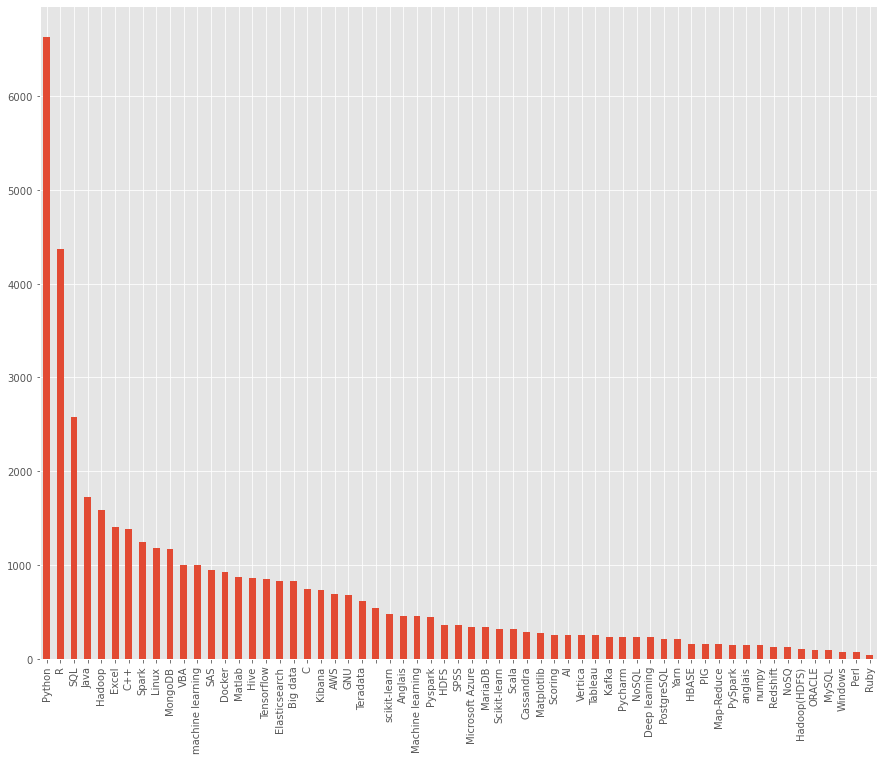

In [12]:
#Split la variable technologies pour voir chaque technologie
df_Tq = pd.DataFrame(df.Technologies.str.split('/').tolist()).stack()
df_Tq  = pd.DataFrame(df_Tq)
df_Tq.columns = ['Technologies']

plt.figure(figsize=(15,12))
df_Tq['Technologies'].value_counts().plot(kind='bar')
plt.show()


In [13]:
print('Les 5 technologies les plus utilisées sont:')
df_Tq['Technologies'].value_counts()[0:5]
    

Les 5 technologies les plus utilisées sont:


Python    6627
R         4374
SQL       2581
Java      1719
Hadoop    1589
Name: Technologies, dtype: int64

### Une méthode de clustering non supervisée pour faire apparaître 2 clusters que vous jugerez pertinents. 

In [14]:
#step1: Transformation les variables catégorielles

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_enc = df.loc[:,['Experience']]
#df_enc['Ville_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Ville']])[:]), index = df_enc.index)
df_enc['Technologies_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Technologies']])[:]), index = df_enc.index)
df_enc['Diplome_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Diplome']])[:]), index = df_enc.index)
df_enc = np.round(df_enc,2)

print(df_enc.head(10))
print(df_enc.info())

   Experience  Technologies_enc  Diplome_enc
0         1.0                27            1
1         3.0                34            1
2         3.0                51            1
3         1.5                 2            1
4         2.0                26            3
5         6.0                56            1
6         0.0                11            0
7         4.0                17            0
8         8.0                19            0
9         5.0                33            1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience        9520 non-null   float64
 1   Technologies_enc  9582 non-null   int32  
 2   Diplome_enc       9582 non-null   int32  
dtypes: float64(1), int32(2)
memory usage: 149.8 KB
None


La méthode choisi pour le clustering est K-Means, pour sa simplicité et à nombre de classes K fixé.

La métrique utilisée est indicateur de compacité des classes pour chaque cluster: 25.67% et 10.44 %
les erreurs de clustering obtenus sont < 20% 
Silhouette Coefficient: 0.008
On remarque Coefficient Silhouette ~1 et <<-1
On remarque aussi que deux technologies revient pus souvent dans le cluster 1 (resp. cluster 2) qui sont : 
SQL/R/Python//Big data                                370
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    310
Name: Technologies, dtype: int64
SQL/R/Python//Big data                                169
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    148
Name: Technologies, dtype: int64
Les caracteristiques imortantes des deux clusters sont le 'Diplome':  
  'Master' & 'Bachelor' pour le deuxieme cluster et 'No diplome' & 'PhD' pour le  premier cluster.

 Affichage des caractéristiques du cahque cluster : 



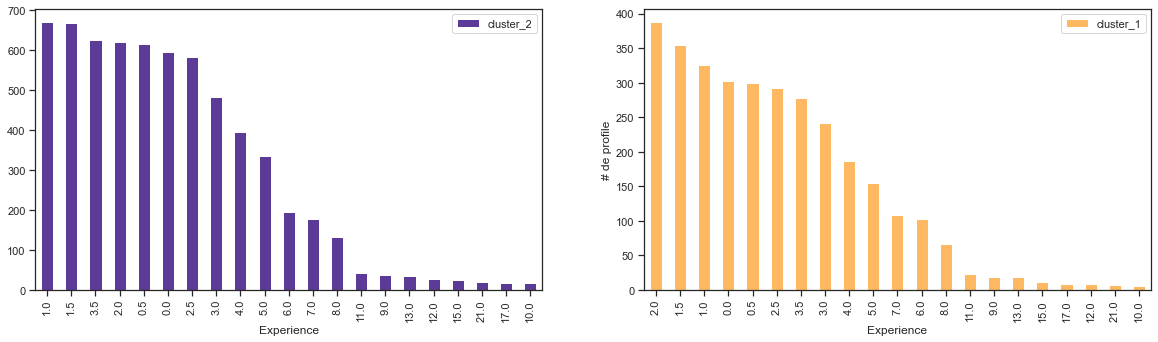

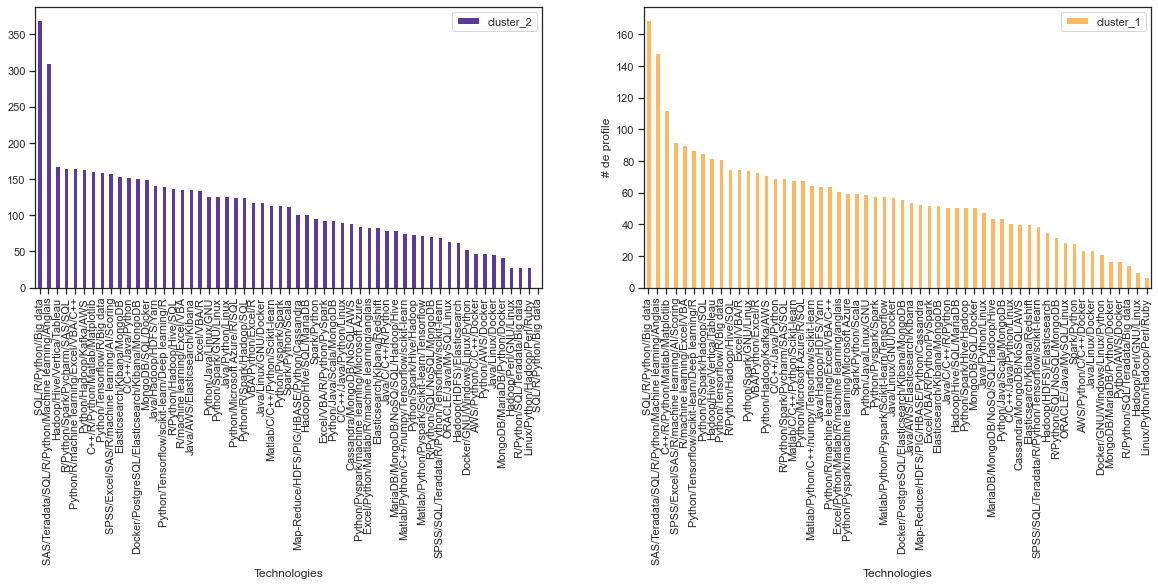

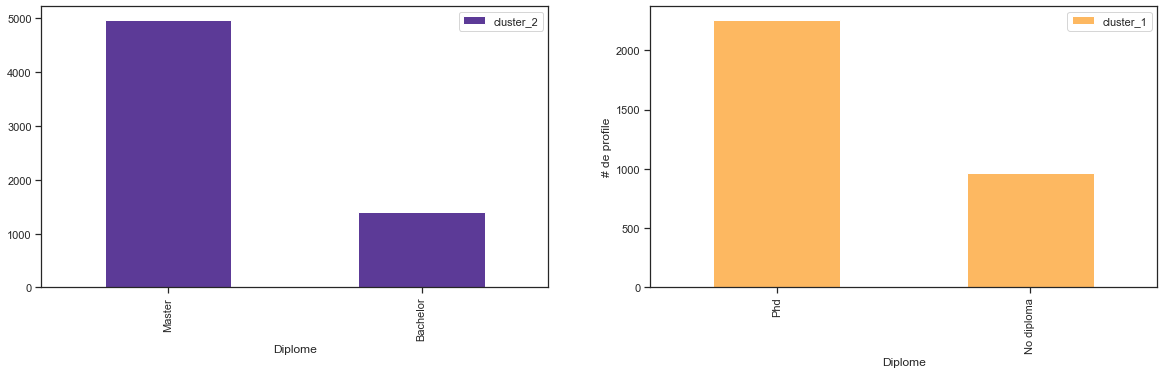

In [15]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#remplire les valeurs qui sont encore encore manquantes dans la variable "Experience" 
mean_da = df_enc['Experience'].dropna().mean()
df_enc['Experience'] = df_enc['Experience'].fillna(mean_da)


X = df_enc.astype(float)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, n_init=100 , max_iter=5000,tol=1e-8,random_state=0).fit(X_scaled)
labels_ = kmeans.labels_
#Ajout des clusters identifiés aux données d'origine
df_enc['Cluster'] = pd.Series(labels_)
df_plot = df.copy()
df_plot['Cluster'] = pd.Series(labels_)
# Evaluation de l'erreur de clustering par: Indicateur de compacité des classes(la dispersion à l’intérieur de chaque groupe).
c1, c2 = kmeans.cluster_centers_
Dist = lambda i,j: 100 * ((i-j)**2).sum() / ((i)**2).sum()
quad_dist1 = Dist(X_scaled[labels_==0], c1) 
quad_dist2 = Dist(X_scaled[labels_==1], c2) 
print('La métrique utilisée est indicateur de compacité des classes pour chaque cluster: {0:2.2f}% et {1:2.2f} %'.format(quad_dist1, quad_dist2))
print("les erreurs de clustering obtenus sont < 20% ")
# Pour l’évaluation intrinsèque, je choisis le coefficient de silhouette :
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_))
print("On remarque Coefficient Silhouette ~1 et <<-1")

print("On remarque aussi que deux technologies revient pus souvent dans le cluster 1 (resp. cluster 2) qui sont : ")
print(df.loc[labels_==0,'Technologies'].value_counts()[0:2])
print(df.loc[labels_==1,'Technologies'].value_counts()[0:2])

print("Les caracteristiques imortantes des deux clusters sont le 'Diplome':\
  \n  'Master' & 'Bachelor' pour le deuxieme cluster et 'No diplome' & 'PhD' pour le  premier cluster.")
# Affichage des résultats
print("\n Affichage des caractéristiques du cahque cluster : \n")      
a = ['Experience', 'Technologies',  'Diplome']# ,'Ville']
sb.set_theme(style="ticks", color_codes=True)

for n,i in enumerate(a,1):
    plt.figure(figsize=(20,30))
    plt.subplot(521),
    ax = df_plot.loc[labels_==0,i].value_counts().plot(kind='bar', color = '#5c3a97ff', label='cluster_2')
    plt.legend()
    plt.xlabel(i)
    plt.subplot(522),
    ax = df_plot.loc[labels_==1,i].value_counts().plot(kind='bar', color = '#fdb861ff', label='cluster_1')
    plt.ylabel("# de profile")
    plt.xlabel(i)
    plt.legend()
plt.show()
    
    

### Réaliser la prédiction des métiers manquants dans la base de données par les algorithmes suivants:  
- Regression Logistique, arbre de décision et Gradient boosting.

Precision de classification par LogisticRegression : 47.0%   

              precision    recall  f1-score   support

           0       0.46      0.20      0.28       542
           1       0.35      0.37      0.36       557
           2       0.52      0.78      0.62       988
           3       0.44      0.13      0.20       304

    accuracy                           0.47      2391
   macro avg       0.44      0.37      0.36      2391
weighted avg       0.46      0.47      0.43      2391

Matrice de confusion

[[107 187 241   7]
 [ 68 207 268  14]
 [ 42 152 766  28]
 [ 15  38 212  39]]


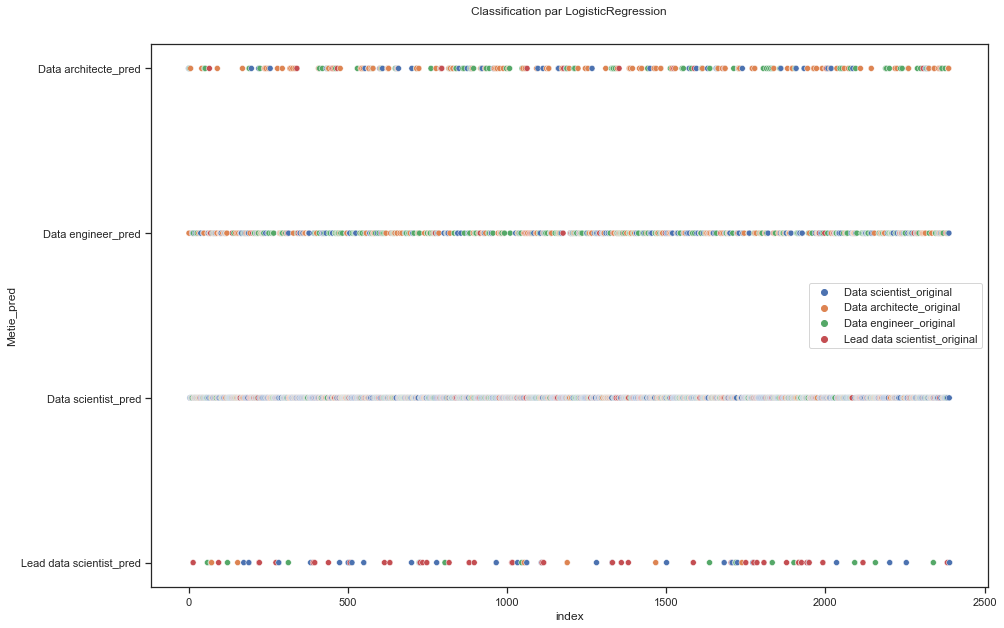

Precision de classification DescisionTreeClassifier: 57.99999999999999%   

              precision    recall  f1-score   support

           0       0.42      0.70      0.53       542
           1       0.66      0.33      0.44       557
           2       0.70      0.69      0.70       988
           3       0.60      0.50      0.55       304

    accuracy                           0.58      2391
   macro avg       0.60      0.55      0.55      2391
weighted avg       0.62      0.58      0.58      2391

Matrice de confusion

[[380  71  91   0]
 [282 182  93   0]
 [192  16 681  99]
 [ 45   7 101 151]]


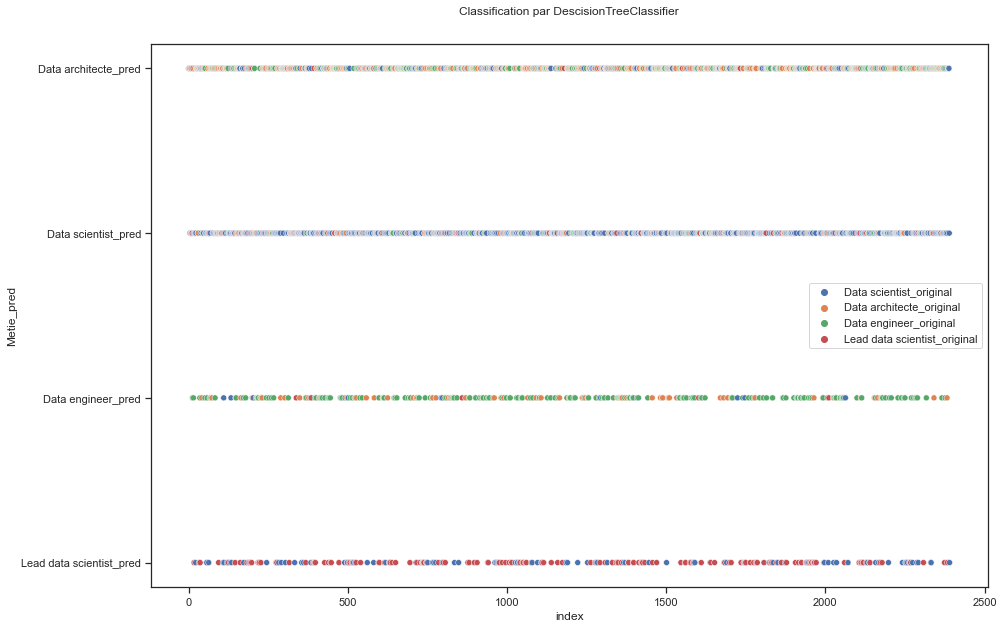

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le = LabelEncoder()
mask = df.loc[:,'Metier'].isna() 
X = np.array(df_enc[~mask])
y_m = df.loc[~mask,'Metier']
y = le.fit_transform(df.loc[~mask,'Metier'].dropna())
Metier_test = np.array(df_enc[mask])
y_lab=[]
for i in [0,1,2,3]:
    y_lab.append(y_m[y==i].unique()[0])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25, shuffle=True, random_state=40)
x_ax = range(len(y_test))

#LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0, max_iter=400, multi_class='multinomial').fit(X_train, y_train)

y_predicted = clf.predict(X_test)
print('Precision de classification par LogisticRegression : '+str(np.round(accuracy_score(y_test, y_predicted),2)*100)+'%   \n')
print(classification_report(y_test, y_predicted)) 
cm = confusion_matrix(y_test, y_predicted)
print('Matrice de confusion\n')
print(cm)

sb.set_theme(style="ticks", color_codes=True)

labels = pd.Series(y_predicted)
metier_pred = [y_m[y==i].unique()[0] for i in labels]
metier_pred = pd.Series(metier_pred)
data = pd.DataFrame({'index': x_ax, 'original': y_test, 'predicted': labels,
                     'Metie_pred':labels, 'Metie_original': y_test })  
cleanup_nums = {"Metie_pred": {i : y_lab[i]+'_pred' for i in range(len(y_lab))},
               "Metie_original": {i : y_lab[i]+'_original' for i in range(len(y_lab))}
               }
data.replace(cleanup_nums, inplace=True)
plt.figure(figsize=(15,10))
g =sb.scatterplot(y="Metie_pred", x="index",   data=data, hue="Metie_original")
#plt.yticks([0,1,2,3], y_lab)
plt.title("Classification par LogisticRegression\n\n")
plt.legend()
plt.show()


# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
cm = confusion_matrix(y_test, dtree_predictions) 
print('Precision de classification DescisionTreeClassifier: '+str(np.round(accuracy_score(y_test, dtree_predictions),2)*100)+'%   \n')
print(classification_report(y_test, dtree_predictions))
print('Matrice de confusion\n')
print(cm)

labels = pd.Series(dtree_predictions)
metier_pred = [y_m[y==i].unique()[0] for i in labels]
metier_pred = pd.Series(metier_pred)
data = pd.DataFrame({'index': x_ax, 'original': y_test , 'predicted': labels,
                     'Metie_pred':labels, 'Metie_original':y_test })  
cleanup_nums = {"Metie_pred": {i : y_lab[i]+'_pred' for i in range(len(y_lab))},
               "Metie_original": {i : y_lab[i]+'_original' for i in range(len(y_lab))}
               }
data.replace(cleanup_nums, inplace=True)
plt.figure(figsize=(15,10))
g =sb.scatterplot(y="Metie_pred", x="index",   data=data, hue="Metie_original")
plt.title("Classification par DescisionTreeClassifier\n\n")
plt.legend()
plt.show()


**On obtient accuracy_TreeClassifier= 58% > accuracy_LogisticRegression= 48%, mais c'est un Précision moyen, de plus les groupes de chaque métier est n'est pas homogene.**

* Gradient boosting

Precision de classification par Gradient boosting est de: 89.0%   

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       542
           1       1.00      1.00      1.00       557
           2       0.85      0.89      0.87       988
           3       0.59      0.50      0.54       304

    accuracy                           0.89      2391
   macro avg       0.86      0.84      0.85      2391
weighted avg       0.88      0.89      0.88      2391

Matrice de confusion

[[536   0   6   0]
 [  0 557   0   0]
 [  5   0 880 103]
 [  4   0 149 151]]


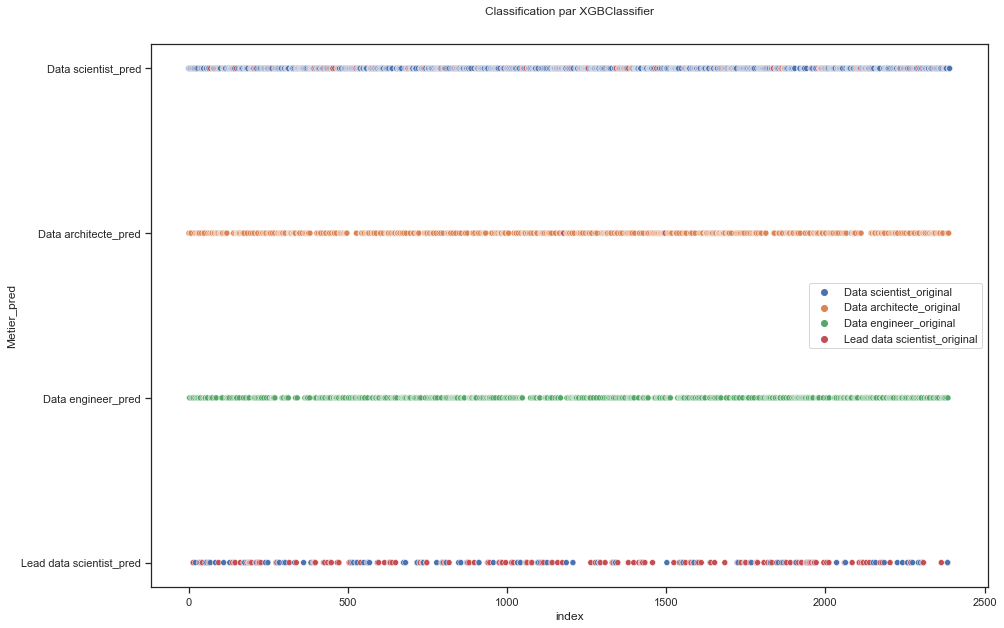

In [17]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")    
            
import xgboost as xgb

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error


clf_xgb = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

clf_xgb.fit(X_train, y_train)

y_predicted = clf_xgb.predict(X_test)

print('Precision de classification par Gradient boosting est de: '+str(np.round(accuracy_score(y_test, y_predicted),2)*100)+'%   \n')
print(classification_report(y_test, y_predicted))
print('Matrice de confusion\n')
print(confusion_matrix(y_test, y_predicted))

labels = pd.Series(y_predicted)
metier_pred = [y_m[y==i].unique()[0] for i in labels]
metier_pred = pd.Series(metier_pred)
data = pd.DataFrame({'index': x_ax, 'original': y_test , 'predicted': labels,
                     'Metier_pred':labels, 'Metier_original': y_test })  
cleanup_nums = {"Metier_pred": {i : y_lab[i]+'_pred' for i in range(len(y_lab))},
               "Metier_original": {i : y_lab[i]+'_original' for i in range(len(y_lab))}
               }
data.replace(cleanup_nums, inplace=True)
plt.figure(figsize=(15,10))
sb.set_theme(style="ticks", color_codes=True)
g =sb.scatterplot(y="Metier_pred", x="index",   data=data, hue="Metier_original")
plt.title("Classification par XGBClassifier\n\n")
plt.legend()
plt.show()


**On obtient un bon accuracy = 0.9. En plus, on peut remarquer une homogénéité très efficace pour les métiers DE et DA, et aussi un bon amélioration pour LDS et DS par rapport aux autres modèles**

###  La prédiction des métiers manquants 

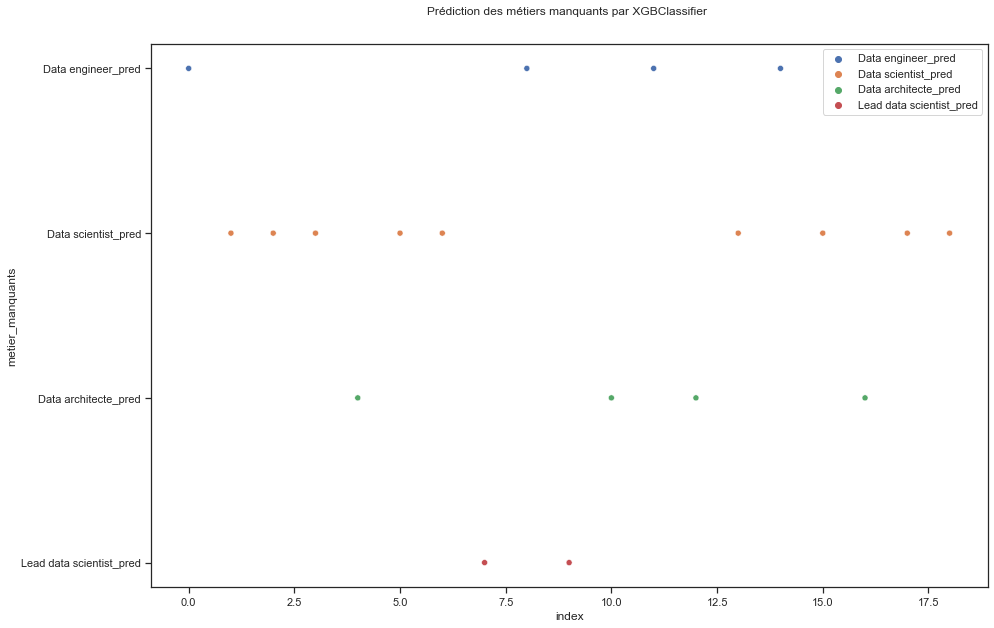

In [19]:

metier_predicted= clf_xgb.predict(Metier_test)
metier_predicted
x_ax = range(len(metier_predicted))
labels = pd.Series(metier_predicted)
metier_pred = [y_m[y==i].unique()[0] for i in labels]
metier_pred = pd.Series(metier_pred)
data = pd.DataFrame({'index': x_ax, 'metier_manquants': labels,
                     'Metie_labels': labels })  
cleanup_nums = {"metier_manquants": {i : y_lab[i]+'_pred' for i in range(len(y_lab))}
               }
data.replace(cleanup_nums, inplace=True)
plt.figure(figsize=(15,10))
g =sb.scatterplot(y="metier_manquants", x="index",   data=data, hue='metier_manquants')
plt.title("Prédiction des métiers manquants par XGBClassifier \n\n")
plt.legend()
plt.show()

In [20]:
df.Metier.isnull().sum()
data.shape
data

,index,metier_manquants,Metie_labels
0,0,Data engineer_pred,1
1,1,Data scientist_pred,2
2,2,Data scientist_pred,2
3,3,Data scientist_pred,2
4,4,Data architecte_pred,0
5,5,Data scientist_pred,2
6,6,Data scientist_pred,2
7,7,Lead data scientist_pred,3
8,8,Data engineer_pred,1
9,9,Lead data scientist_pred,3
